# Tutorial on how to handle categorical data from [here](https://www.datacamp.com/community/tutorials/categorical-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_BioGrid\data-BioGrid-Yeast.xlsx',header=0)


In [3]:
data=data.drop(columns=['gene-query','gene-target','gene-target-description','gene-query-description','Unnamed: 8','Unnamed: 9','Unnamed: 10'])

In [4]:
data.head()

,gene-query-name,gene-target-name,interaction-type,paper-source
0,CDC73,CTR9,Affinity Capture-MS,Krogan NJ (2004)
1,CTR9,CDC73,Affinity Capture-MS,Krogan NJ (2004)
2,CDC73,LEO1,Affinity Capture-MS,Krogan NJ (2004)
3,LEO1,CDC73,Affinity Capture-MS,Krogan NJ (2004)
4,CDC73,PAF1,Affinity Capture-MS,Krogan NJ (2004)


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365385 entries, 0 to 365384
Data columns (total 4 columns):
gene-query-name     365385 non-null object
gene-target-name    365385 non-null object
interaction-type    365385 non-null object
paper-source        365385 non-null object
dtypes: object(4)
memory usage: 11.2+ MB
None


As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method ```.copy()``` is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [6]:
cat_data = data.select_dtypes(include=['object']).copy()

In [16]:
cat_data.head()

,gene-query-name,gene-target-name,interaction-type,paper-source
0,CDC73,CTR9,Affinity Capture-MS,Krogan NJ (2004)
1,CTR9,CDC73,Affinity Capture-MS,Krogan NJ (2004)
2,CDC73,LEO1,Affinity Capture-MS,Krogan NJ (2004)
3,LEO1,CDC73,Affinity Capture-MS,Krogan NJ (2004)
4,CDC73,PAF1,Affinity Capture-MS,Krogan NJ (2004)


One of the most common data pre-processing steps is to check for null values in the dataset. You can get **the total number of missing values in the DataFrame** by the following one liner code:

In [27]:
if cat_data.isnull().values.sum()==0:
    print('Hooray!! There are no NaN values in the dataframe')
else:
    print(cat_data.isnull().values.sum())

Hooray!! There are no NaN values in the dataframe


Let's also check the column-wise distribution of null values:

In [28]:
print(cat_data.isnull().sum())

gene-query-name     0
gene-target-name    0
interaction-type    0
paper-source        0
dtype: int64


Another **Exploratory Data Analysis (EDA)** step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the ```.value_counts()``` method as described earlier.

In [34]:
print(cat_data['interaction-type'].value_counts())

Negative Genetic                 116270
Affinity Capture-MS               59194
Positive Genetic                  43340
Synthetic Growth Defect           25192
Affinity Capture-Western          16665
Synthetic Lethality               16243
Two-hybrid                        15985
Affinity Capture-RNA              12446
Reconstituted Complex              7694
Phenotypic Enhancement             7532
Synthetic Rescue                   6837
Phenotypic Suppression             6683
PCA                                6587
Biochemical Activity               6413
Dosage Rescue                      5732
Co-purification                    4345
Dosage Growth Defect               1984
Dosage Lethality                   1628
Co-fractionation                    972
Co-crystal Structure                879
Protein-peptide                     841
Co-localization                     677
Protein-RNA                         573
Synthetic Haploinsufficiency        307
FRET                                220


In [35]:
print(cat_data['gene-query-name'].value_counts())

NAB2       2676
PUF3       2119
HSP82      2042
SSB2       2018
RPN11      1735
           ... 
MTC2          1
LSO2          1
AAD14         1
YPR172W       1
YNL234W       1
Name: gene-query-name, Length: 5141, dtype: int64


To know **the count of distinct categories within the feature** you can chain the previous code with the ```.count()``` method:

In [37]:
print(cat_data['interaction-type'].value_counts().count(),cat_data['gene-query-name'].value_counts().count(),cat_data['gene-target-name'].value_counts().count())

27 5141 6347


Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the seaborn package, which shows the frequency distribution of the carrier column. You can play with different arguments to change the look of the plot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

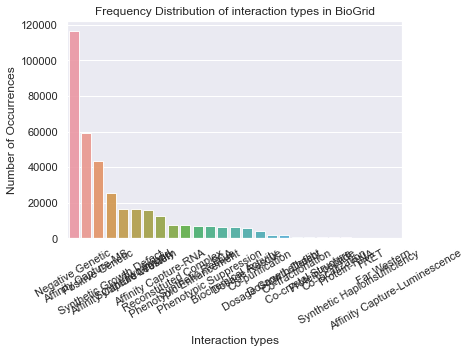

In [40]:
carrier_count = cat_data['interaction-type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of interaction types in BioGrid')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interaction types', fontsize=12)
plt.xticks(rotation=30)

## Encoding Categorical Data

The techniques that you'll cover are the following:

1. Replacing values
2. Encoding labels
3. One-Hot encoding
4. Binary encoding

### Replace Values

Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the ```replace()``` function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

You will store the category names in a list called ```labels``` and then ```zip``` it to a sequence of numbers and iterate over it. The final dictionary will organize the labels in alphabetical order. 

In [41]:
labels = cat_data['interaction-type'].astype('category').cat.categories.tolist()
replace_map_comp = {'interaction-type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [42]:
print(replace_map_comp)

{'interaction-type': {'Affinity Capture-Luminescence': 1, 'Affinity Capture-MS': 2, 'Affinity Capture-RNA': 3, 'Affinity Capture-Western': 4, 'Biochemical Activity': 5, 'Co-crystal Structure': 6, 'Co-fractionation': 7, 'Co-localization': 8, 'Co-purification': 9, 'Dosage Growth Defect': 10, 'Dosage Lethality': 11, 'Dosage Rescue': 12, 'FRET': 13, 'Far Western': 14, 'Negative Genetic': 15, 'PCA': 16, 'Phenotypic Enhancement': 17, 'Phenotypic Suppression': 18, 'Positive Genetic': 19, 'Protein-RNA': 20, 'Protein-peptide': 21, 'Reconstituted Complex': 22, 'Synthetic Growth Defect': 23, 'Synthetic Haploinsufficiency': 24, 'Synthetic Lethality': 25, 'Synthetic Rescue': 26, 'Two-hybrid': 27}}


Throughout this tutorial, you will be making a copy of the dataset via the ```.copy()``` method to practice each encoding technique to ensure that the original DataFrame stays intact and whatever changes you are doing happen only in the copied one.

In [43]:
cat_data_replace = cat_data.copy()

In [44]:
cat_data_replace.replace(replace_map_comp, inplace=True)

print(cat_data_replace.head())

gene-query-name gene-target-name  interaction-type      paper-source
0           CDC73             CTR9                 2  Krogan NJ (2004)
1            CTR9            CDC73                 2  Krogan NJ (2004)
2           CDC73             LEO1                 2  Krogan NJ (2004)
3            LEO1            CDC73                 2  Krogan NJ (2004)
4           CDC73             PAF1                 2  Krogan NJ (2004)


As you can observe, you have encoded the categories with the mapped numbers in your DataFrame.

## Label encoding

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1

You can do label encoding via attributes ```.cat.codes``` on your DataFrame's column.

In [48]:
cat_data_lc=cat_data.copy().astype('category') # In general converting to a  category variable is much faster and handy that leaves them as object


In [49]:
cat_data_lc['interaction-type'] = cat_data_lc['interaction-type'].cat.codes

In [51]:
cat_data_lc.head() #alphabetically labeled from 0 to number of categories : 27

,gene-query-name,gene-target-name,interaction-type,paper-source
0,CDC73,CTR9,1,Krogan NJ (2004)
1,CTR9,CDC73,1,Krogan NJ (2004)
2,CDC73,LEO1,1,Krogan NJ (2004)
3,LEO1,CDC73,1,Krogan NJ (2004)
4,CDC73,PAF1,1,Krogan NJ (2004)


Sometimes, **you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value**.

You could do this by using numpy's ```where()``` function like shown below. 
Example: You will encode all the synthetic lethals to value 1 and other types to value 0. This will create a new column in your DataFrame with the encodings. Later, if you want to drop the original column, you can do so by using the ```drop()``` function in pandas.

In [53]:
cat_data_specific = cat_data.copy()
cat_data_specific['SL-code'] = np.where(cat_data_specific['interaction-type'].str.contains('Lethality'), 1, 0)

cat_data_specific.head()

,gene-query-name,gene-target-name,interaction-type,paper-source,SL-code
0,CDC73,CTR9,Affinity Capture-MS,Krogan NJ (2004),0
1,CTR9,CDC73,Affinity Capture-MS,Krogan NJ (2004),0
2,CDC73,LEO1,Affinity Capture-MS,Krogan NJ (2004),0
3,LEO1,CDC73,Affinity Capture-MS,Krogan NJ (2004),0
4,CDC73,PAF1,Affinity Capture-MS,Krogan NJ (2004),0


In [55]:
cat_data_specific[cat_data_specific['SL-code']==1].head()

,gene-query-name,gene-target-name,interaction-type,paper-source,SL-code
275,BNI1,SWE1,Synthetic Lethality,Goehring AS (2003),1
276,BUD6,SWE1,Synthetic Lethality,Goehring AS (2003),1
277,CDC42,BEM1,Synthetic Lethality,Kozminski KG (2003),1
278,CDC42,BEM4,Synthetic Lethality,Kozminski KG (2003),1
279,CDC42,BNI1,Synthetic Lethality,Kozminski KG (2003),1


## You can achieve the same label encoding using 

```python
scikit-learn's, LabelEncoder 
```

In [57]:
cat_data_sklearn = cat_data.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_data_sklearn['type_code'] = lb_make.fit_transform(cat_data['interaction-type'])

cat_data_sklearn.tail() #Results in appending a new column to df

,gene-query-name,gene-target-name,interaction-type,paper-source,type_code
365380,YNL181W,DEP1,Positive Genetic,Costanzo M (2016),18
365381,YNL181W,DEP1,Negative Genetic,Costanzo M (2016),14
365382,YNL181W,FUN30,Positive Genetic,Costanzo M (2016),18
365383,YNL181W,CLN3,Positive Genetic,Costanzo M (2016),18
365384,YNL181W,CNE1,Positive Genetic,Costanzo M (2016),18


Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. 

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.


## One-Hot encoding

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' ```.get_dummies()``` method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.

In [65]:
cat_data_onehot = cat_data.copy()
cat_data_onehot = pd.get_dummies(cat_data_onehot, columns=['interaction-type'])


cat_data_onehot.head()

,gene-query-name,gene-target-name,paper-source,interaction-type_Affinity Capture-Luminescence,interaction-type_Affinity Capture-MS,interaction-type_Affinity Capture-RNA,interaction-type_Affinity Capture-Western,interaction-type_Biochemical Activity,interaction-type_Co-crystal Structure,interaction-type_Co-fractionation,...,interaction-type_Phenotypic Suppression,interaction-type_Positive Genetic,interaction-type_Protein-RNA,interaction-type_Protein-peptide,interaction-type_Reconstituted Complex,interaction-type_Synthetic Growth Defect,interaction-type_Synthetic Haploinsufficiency,interaction-type_Synthetic Lethality,interaction-type_Synthetic Rescue,interaction-type_Two-hybrid
0,CDC73,CTR9,Krogan NJ (2004),0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CTR9,CDC73,Krogan NJ (2004),0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CDC73,LEO1,Krogan NJ (2004),0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LEO1,CDC73,Krogan NJ (2004),0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CDC73,PAF1,Krogan NJ (2004),0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


```scikit-learn``` also supports one hot encoding via ```LabelBinarizer``` and ```OneHotEncoder``` in its preprocessing module (check out the details here). Just for the sake of practicing you will do the same encoding via ```LabelBinarizer```:

In [67]:
cat_data_onehot_sklearn = cat_data.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_data_onehot_sklearn['interaction-type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,Affinity Capture-Luminescence,Affinity Capture-MS,Affinity Capture-RNA,Affinity Capture-Western,Biochemical Activity,Co-crystal Structure,Co-fractionation,Co-localization,Co-purification,Dosage Growth Defect,...,Phenotypic Suppression,Positive Genetic,Protein-RNA,Protein-peptide,Reconstituted Complex,Synthetic Growth Defect,Synthetic Haploinsufficiency,Synthetic Lethality,Synthetic Rescue,Two-hybrid
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
result_df = pd.concat([cat_data_onehot_sklearn, lb_results_df], axis=1)

result_df.head()

,gene-query-name,gene-target-name,interaction-type,paper-source,Affinity Capture-Luminescence,Affinity Capture-MS,Affinity Capture-RNA,Affinity Capture-Western,Biochemical Activity,Co-crystal Structure,...,Phenotypic Suppression,Positive Genetic,Protein-RNA,Protein-peptide,Reconstituted Complex,Synthetic Growth Defect,Synthetic Haploinsufficiency,Synthetic Lethality,Synthetic Rescue,Two-hybrid
0,CDC73,CTR9,Affinity Capture-MS,Krogan NJ (2004),0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CTR9,CDC73,Affinity Capture-MS,Krogan NJ (2004),0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CDC73,LEO1,Affinity Capture-MS,Krogan NJ (2004),0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LEO1,CDC73,Affinity Capture-MS,Krogan NJ (2004),0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CDC73,PAF1,Affinity Capture-MS,Krogan NJ (2004),0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**While one-hot encoding solves the problem of unequal weights given to categories within a feature**, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

## Binary Encoding
This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

You can do binary encoding via a number of ways but the simplest one is using the category_encoders library. You can install category_encoders via pip install category_encoders on cmd or just download and extract the .tar.gz file from the site.

You have to first import the category_encoders library after installing it. Invoke the BinaryEncoder function by specifying the columns you want to encode and then call the .fit_transform() method on it with the DataFrame as the argument.

In [8]:
cat_data_ce = cat_data.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['interaction-type'])
df_binary = encoder.fit_transform(cat_data_ce)

df_binary.head()

,interaction-type_0,interaction-type_1,interaction-type_2,interaction-type_3,interaction-type_4,gene-query-name,gene-target-name,paper-source
0,0,0,0,0,0,CDC73,CTR9,Krogan NJ (2004)
1,0,0,0,0,0,CTR9,CDC73,Krogan NJ (2004)
2,0,0,0,0,0,CDC73,LEO1,Krogan NJ (2004)
3,0,0,0,0,0,LEO1,CDC73,Krogan NJ (2004)
4,0,0,0,0,0,CDC73,PAF1,Krogan NJ (2004)
